# Energy Balance Models II

Let's again start by considering the radiation balance in a circumpolar band bounded by latitudes $\phi$ and $\phi + \delta\phi$, as in the figure below:

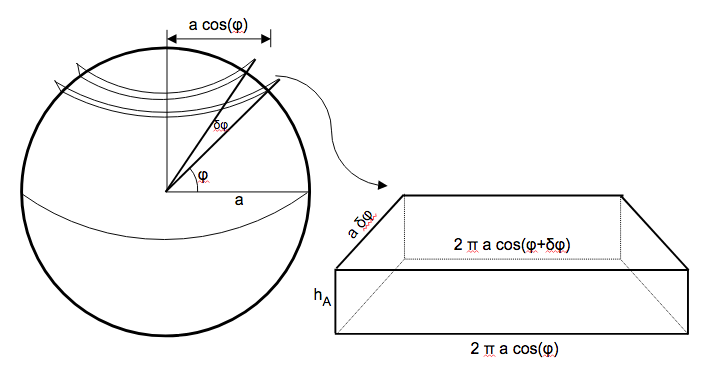

Defining the east-west box length as $L(\phi) = 2\pi a \cos\phi$, the southern edge has length $L(\phi)$ and the northern edge is a little shorter, with length $L(\phi + \delta\phi)$.  The north-south width is $a\, \delta\phi$, and the height is the height of the atmosphere, $h_A$.  

In the first model, the only disequilibrium allowed was due to the ground temperature 'memory', but even this introduced a good deal of complexity.  Atmospheric heat transport also plays a significant role in setting the temperature at each latitude.  We'll have to return to the atmospheric balance before including this new term in the equation for the time-rate-of-change of the ground temperature.

We'll again assume the atmosphere to be instantaneously in balance, with \[power in\] $=$ \[power out\]. Given an atmospheric energy flux (energy per area per time) $F_A(\phi)$ through a wall around the earth of length $L(\phi)$ and height $h_A$, the energy balance includes the flux in at $\phi$ and the flux out at $\phi + \delta\phi)$

$$a\delta\phi\,L(\phi)\,\epsilon\sigma T^4 + h_A L(\phi) F_A(\phi) 
  = 2 \, a\delta\phi\,L(\phi) \sigma T_A^4 + h_A L(\phi+\delta\phi) F_A(\phi+\delta\phi)
$$

where the factor of 2 on the right comes from the fact that the atmosphere is radiating both upwards and downwards.  Solving for the atmpospheric radiation term, we have

$$\sigma T_A^4 = \frac{\epsilon}{2}\sigma T^4 
- \frac{h_A}{2 a L(\phi)}\frac{F_A(\phi+\delta\phi)L(\phi+\delta\phi)-F_A(\phi)L(\phi)}{\delta\phi}
\longrightarrow 
\frac{\epsilon}{2}\sigma T^4 - \frac{h_A}{2 a \cos(\phi)}\,\frac{d}{d\phi}[ F_A(\phi)\cos\phi ] 
$$

where in the last step we've let $\delta\phi\rightarrow 0$. As in EBMI, the rate of increase of ground energy is given by the difference in power in and power out, just as before

$$\gamma_G\frac{dT_G}{dt} = (1-\alpha)S + \sigma T_A^4 - \sigma T_G^4$$

and so using the expression above for $\sigma T_A^4$ we have

$$\gamma_G \frac{dT}{dt} = [1-\alpha(T)]S(\phi) - \beta T^4 
+ \frac{h_A}{2 a \cos(\phi)} \, \frac{d}{d\phi} [F_A(\phi) \cos(\phi) ]
\quad\text{where}\quad
\beta = \left(1-\frac{\epsilon}{2}\right)\sigma.
$$  

Here we'll model the transport using a diffusive approximation:  atmospheric energy flux will be assumed proportional to minus the gradient of the energy density, itself proportional to the ground temperature $T$.  Assuming the atmosphere to have heat capacity $c_A$ ($=c_p=1003$ J/kg K) and density $\rho_A = 1.2$ kg/m$^3$, the atmospheric flux is

$$
F_A = -D\, \frac{d[c_A\rho_AT]}{dy} = -D\, \frac{c_A\rho_A}{a}\frac{dT}{d\phi}
$$

where we've used the fact that the coordinate $y = a\phi$ is the distance along the sphere to latitude $\phi$ from the equator ($\phi=0$).  The diffusivity $D$ has units m$^2$/s.  Substituting this into the expression above, we have

$$\boxed{\gamma_G \frac{\partial T}{\partial t} =  [1-\alpha(T)]S(\phi) - \beta T^4 
+ \frac{D\,\gamma_A}{2 a^2 \cos(\phi)} \, \frac{\partial}{\partial\phi}\left[\cos(\phi)\frac{\partial T}{\partial\phi}\right]}$$

where $\gamma_A = c_A\rho_Ah_A$, and we've changed to partial derivatives, in recognition of the fact that $T = T(\phi,t)$.

This equation, like our earlier model without atmospheric transport, is solved by a particular $T(\phi,t)$, but in this case it's harder. In the earlier case we could analyze the equation at each $\phi$ independently; here, values at neighboring latitudes are coupled through the derivatives in $\phi$.  We will have to use a numerical method to solve the equation, given an initial temperature $T(\phi,0)$.

In [ ]:
sigma = 5.67e-8  # Boltzman constant (W/K^4/m^2)
S0 = 1367        # solar constant (W/m^2)
a = 6370000      # radius of earth (m)
c_A = 1005       # heat capacity of air (J/kg*K)
c_W = 4000       # heat capacity of water (J/kg*K)
rho_A = 1.2      # density of air (kg/m^3)
rho_W = 1020     # density of water (kg/m^3)
h_A = 10000      # height of atmosphere (m)
h_W = 100        # depth of swampy ground layer (m)
aL = .7          # albedo for T<TLa
aH = .3          # albedo for T>THa
TLa = 250        # low temp limit for albedo (K)
THa = 280        # high temp limit for albedo (K)
